<a href="https://colab.research.google.com/github/mariyagolchin/Heart-diseases-Prediction-using-MachineLearning/blob/main/90_heart_attack_analysis_prediction_90_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# About this dataset
# Age : Age of the patient

# Sex : Sex of the patient

# exang: exercise induced angina (1 = yes; 0 = no)

# ca: number of major vessels (0-3)

# cp : Chest Pain type chest pain type

# Value 1: typical angina
# Value 2: atypical angina
# Value 3: non-anginal pain
# Value 4: asymptomatic
# trtbps : resting blood pressure (in mm Hg)

# chol : cholestoral in mg/dl fetched via BMI sensor

# fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

# rest_ecg : resting electrocardiographic results

# Value 0: normal
# Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
# thalach : maximum heart rate achieved

# target : 0= less chance of heart attack 1= more chance of heart attack

# n

# <center> Heart-Attack Analysis & Prediction  </center>

<img src="https://source.wustl.edu/wp-content/uploads/2019/02/HeartImage.jpg" height=300 width= 500 alt="Heart Attack Analysis" style="margin-left: 30%" >

##### Importing libraries 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Following are the list of algorithm that are used in this notebook

| **Algorithm**       |
| : -----------  :    |
| Logistic Regression | 
| Decision Tree       | 
| Random Forest       | 
| XGBoost             | 
| KNeighbours         |
| SVM         |
 

#####  In this following cell we have read the dataset using pandas.
##### It is considered as a good practice to make a copy of main data and work on the copy of dataset. 

In [5]:
main_df = pd.read_csv('/content/drive/MyDrive/KaggleData/HeartDiseasePrediction/heart.csv')
df = main_df.copy()

In [6]:
# Getting top 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In above cell we have listed out top 5 rows of the dataset.

In [7]:
# Dimension of dataframe
df.shape

(303, 14)

We have 303 rows and 14 columns in our dataset

In [8]:
# List of all columns present in dataframe
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
# To view some basic statistical details 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In our dataset Mean age is 54, Minimum age is 29, maximum age is 77, 25% of the people in our dataset have age less than 47 and 75% of the people in our dataset have age less than 61.

In [10]:
# getting the information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


By above table we can see that non of our value is object type, all of them are numerical type with no missing value.

In [11]:
#  check for null value 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# checking number of unique values in each column
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

## Visualization 

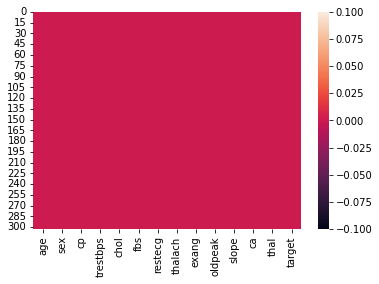

In [13]:
# Checking null value using heatmap
sns.heatmap(df.isnull())

No dot/marks are present in the graph (red region) it means we donot have any missing value.

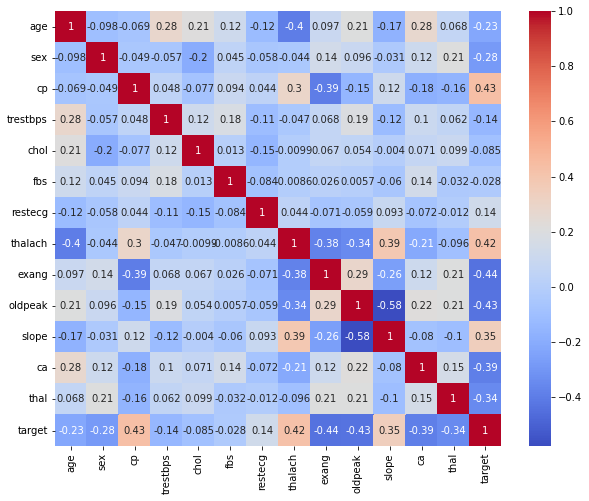

In [14]:
# correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

Two features can be positively correlated or  negatively. But if they are highly correlated then we should drop one of them.

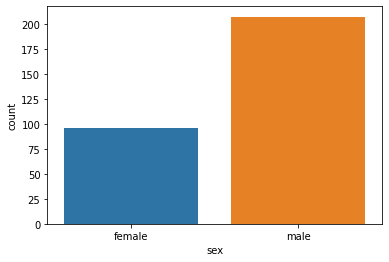

In [15]:
ax = sns.countplot(x = "sex",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["female", "male"])
plt.show()

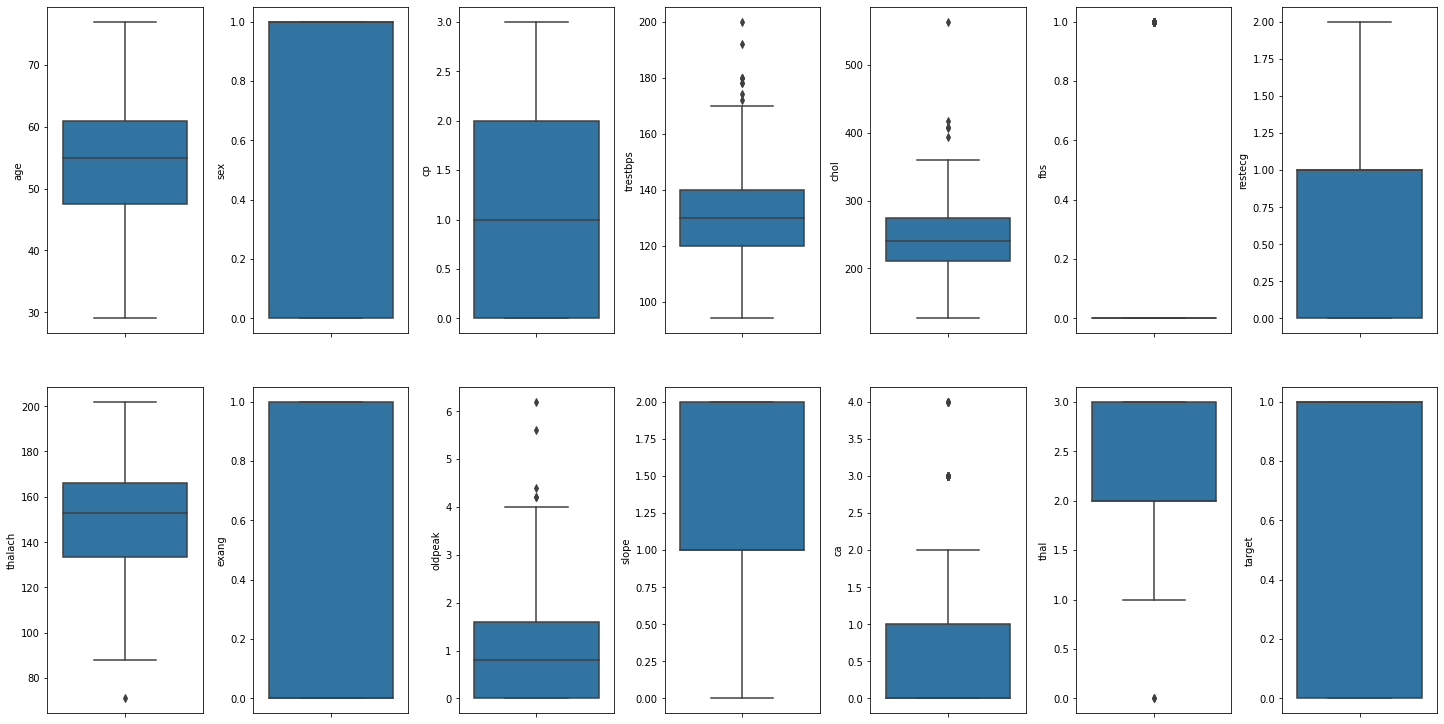

In [16]:
# Visualizing dataset and also checking for outliers 

fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

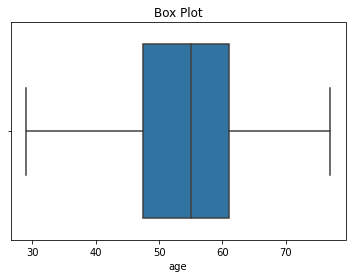

In [17]:
# Individual box plot for each feature
def Box(df):
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box(df['age'])

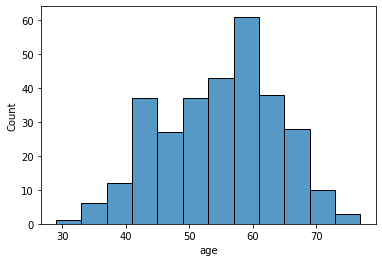

In [18]:
sns.histplot(x = "age", data=df)

In [22]:
# Min-Max normalization
# Here we are taking only 4 column for normalization because in this the value are too high as compare to others

cols = ['trestbps', 'chol', 'thalach', 'oldpeak', 'age']
for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum)/ (maximum - minimum)

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


In [26]:
print(df[["sex", "target"]].groupby(['sex']).mean())

       target
sex          
0    0.750000
1    0.449275


In [27]:
print(df[["cp", "target"]].groupby(['cp']).mean())

      target
cp          
0   0.272727
1   0.820000
2   0.793103
3   0.695652


In [28]:
print(df[["fbs", "target"]].groupby(['fbs']).mean())


       target
fbs          
0    0.550388
1    0.511111


In [32]:
print (df[["exang", "target"]].groupby(['exang']).mean())

         target
exang          
0      0.696078
1      0.232323


In [33]:
print (df[["exang", "target"]].groupby(['exang']).mean())

         target
exang          
0      0.696078
1      0.232323


Here we are grouping the data based on different categories and therefore we can also check other features for more information.

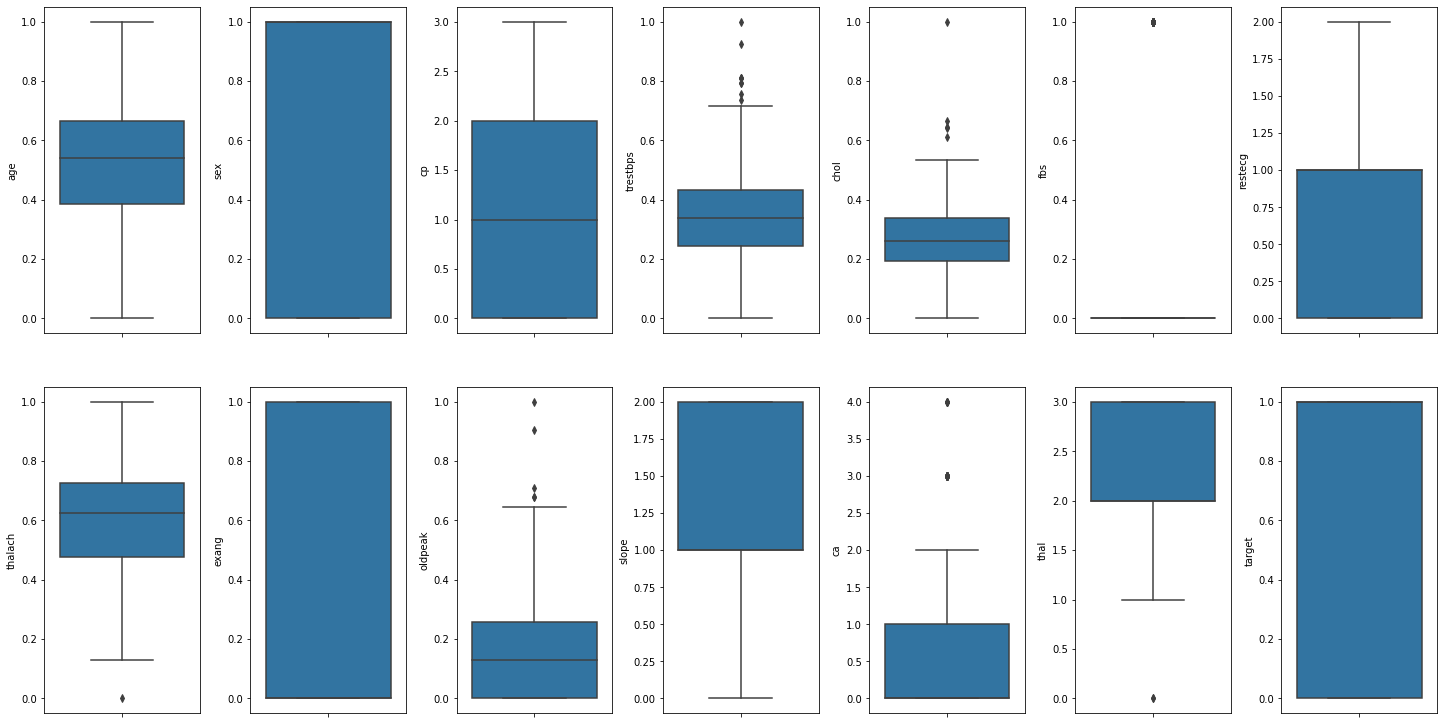

In [34]:
# Visualizing after min-max normalization 
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

In [35]:
# Here we can see that after min-max normalization values now ranges from 0 to 1
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


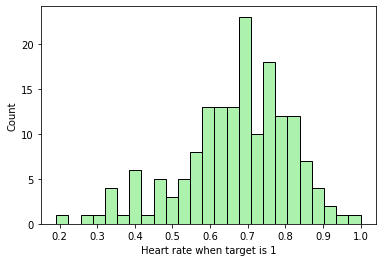

In [39]:
# Exploring dataset through visualization
df1=df[df["target"] == 1]
sns.histplot(df1["thalach"],bins=25, color="lightgreen");
plt.xlabel("Heart rate when target is 1")
plt.show()

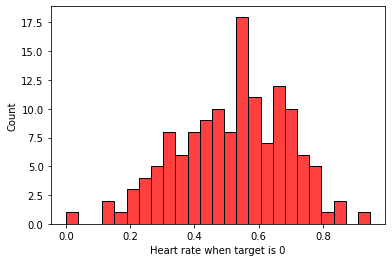

In [41]:
# Exploring dataset through visualization
df2=df[df["target"]==0]
sns.histplot(df2["thalach"],bins=25,  color="red");
plt.xlabel("Heart rate when target is 0")
plt.show()

In [43]:
# dropping 'output' from dataframe and saving dataframe in X which is now acting as input column
X = df.drop("target", axis=1)
X.shape

(303, 13)

In [44]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2


In [45]:
# y have only 'output' column 
y = df['target']
y.shape

(303,)

#### Performing train_test_split

In [46]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [48]:
# Creating model object
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

In [49]:
# Training Model
model_lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='auto', n_jobs=20, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [50]:
# Making Prediction
pred_lg = model_lg.predict(X_test)

In [51]:
# Calculating Accuracy Score
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.8360655737704918


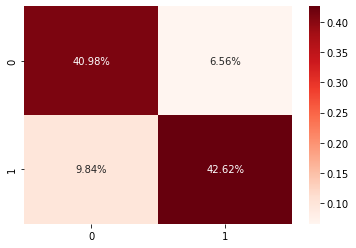

In [53]:
# confusion Maxtrix
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

* Here,  Type-1 Error is 6.56% which is also known as False Positive.
* Type-2 Error is 9.84% which is also known as False Negative.
* while other % value in the confusion matrix represents that they are correctly  predicted in their specific categories.

## Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
# Creating model object
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)

In [56]:
# Training Model
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [57]:
# Making Prediction
pred_dt = model_dt.predict(X_test)

In [58]:
# Calculating Accuracy Score
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.8524590163934426


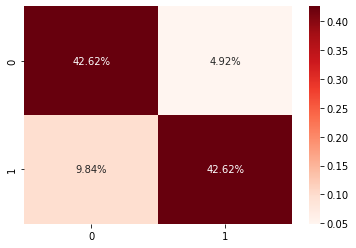

In [59]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

* Here,  Type-1 Error is 4.92% which is also known as False Positive.
* Type-2 Error is 9.84% which is also known as False Negative.
* while other % value in the confusion matrix represents that they are correctly  predicted in their specific categories.

## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [62]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [63]:
# Making Prediction
pred_rf = model_rf.predict(X_test)

In [64]:
# Calculating Accuracy Score
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.9016393442622951


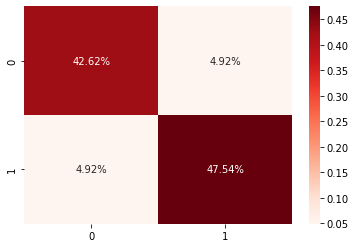

In [65]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

* Here,  Type-1 Error is 4.92% which is also known as False Positive.
* Type-2 Error is 4.92% which is also known as False Negative.
* while other % value in the confusion matrix represents that they are correctly  predicted in their specific categories.

### XGBoost

In [66]:
from xgboost import XGBClassifier

In [67]:
# Creating model object
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 12, random_state= 42)

In [68]:
# Training Model
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=12, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
# Making Prediction
pred_xgb = model_xgb.predict(X_test)

In [70]:
# Calculating Accuracy Score
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.8360655737704918


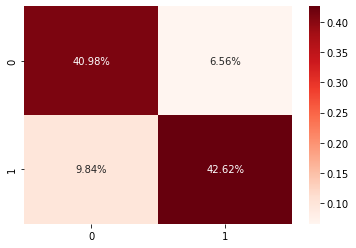

In [71]:
# confusion Maxtrix
cm4 = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')

* Here,  Type-1 Error is 4.92% which is also known as False Positive.
* Type-2 Error is 9.84% which is also known as False Negative.
* while other % value in the confusion matrix represents that they are correctly  predicted in their specific categories.

### KNeighbours

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

In [74]:
# Training Model
model_kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [75]:
# Making Prediction
pred_kn = model_kn.predict(X_test)


In [76]:
# Calculating Accuracy Score
kn = accuracy_score(y_test, pred_kn)
print(kn)

0.9016393442622951


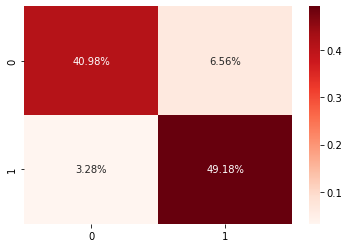

In [77]:
# confusion Maxtrix
cm5 = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')

* Here,  Type-1 Error is 6.56% which is also known as False Positive.
* Type-2 Error is 3.28% which is also known as False Negative.
* while other % value in the confusion matrix represents that they are correctly  predicted in their specific categories.

##  SVM

In [78]:
from sklearn.svm import SVC, LinearSVC

In [79]:
model_svm = SVC(kernel='rbf', random_state = 42)

In [80]:
model_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [81]:
# Making Prediction
pred_svm = model_svm.predict(X_test)

In [82]:
# Calculating Accuracy Score
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.8688524590163934


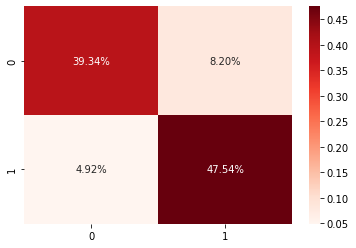

In [83]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm6/np.sum(cm6), annot = True, fmt=  '0.2%', cmap = 'Reds')

* Here,  Type-1 Error is 6.56% which is also known as False Positive.
* Type-2 Error is 6.56% which is also known as False Negative.
* while other % value in the confusion matrix represents that they are correctly  predicted in their specific categories.

### Accuracy score dataframe

,Model,Accuracy_score
2,Random Forest,0.901639
4,KNeighbours,0.901639
5,SVM,0.868852
1,Decision Tree,0.852459
0,Logistic Regression,0.836066
3,XGBoost,0.836066


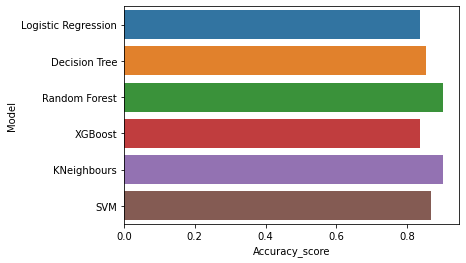

In [84]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM'],
    'Accuracy_score' :[lg, dt, rf, xgb, kn, sv]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

### Conclusion :- After few hyperparameter tuning Random Forest and  Kneighbour Achieved the highest accuracy here 